# Problem Statement

3.	An online car sales platform would like to improve its customer base and their experience by providing them an easy way to buy and sell cars. For this, they would like an automated model which can predict the price of the car once the user inputs the required factors. Help the business achieve their objective by applying multilinear regression on the given dataset. Please use the below columns for the analysis purpose: price, age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, and Weight.

----- ### ------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

We will load the complete report and from there we will use above mentioned columns

In [2]:
report = pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
report.shape

(1436, 38)

In [3]:
report.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
report.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
data = report[['Price', 'Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [6]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


We will now do Exploratory Analysis of our data

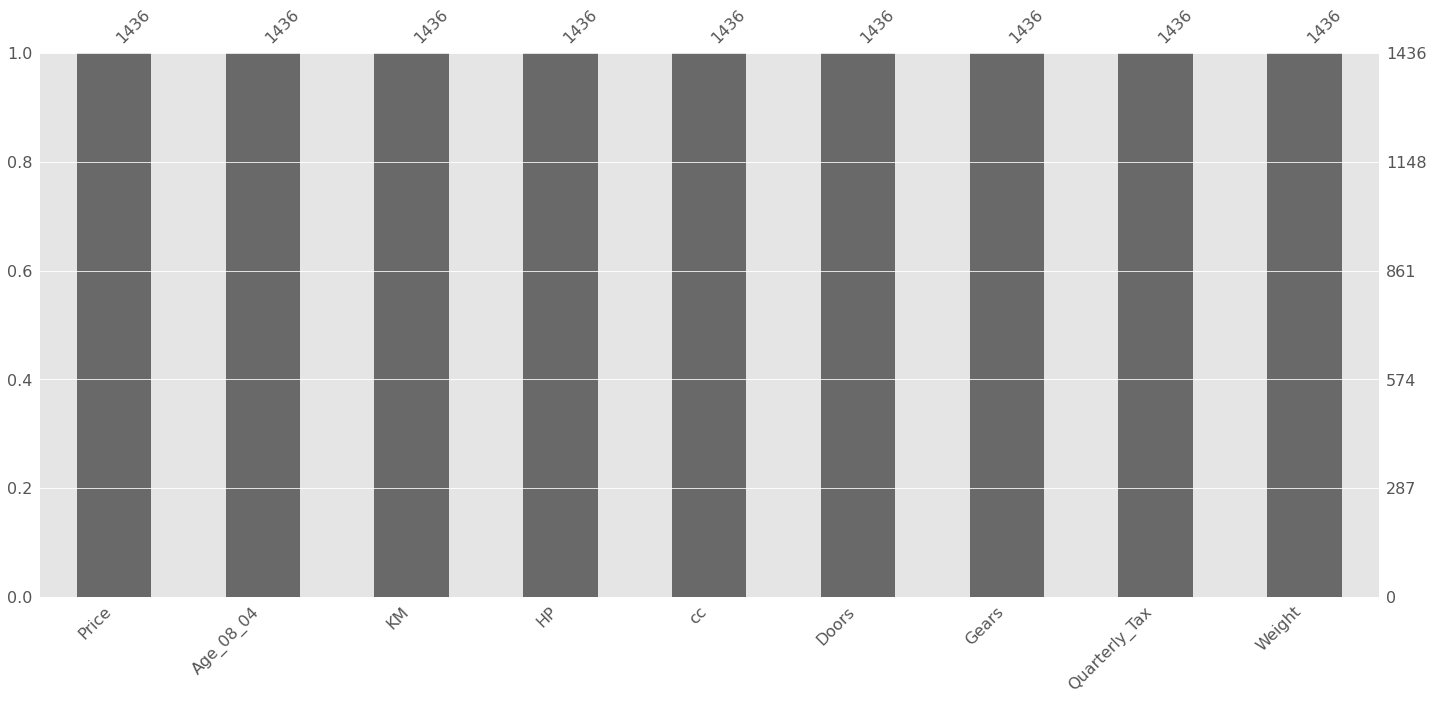

In [7]:
msno.bar(data)

Seems like there is no missing values in our data

In [8]:
data.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

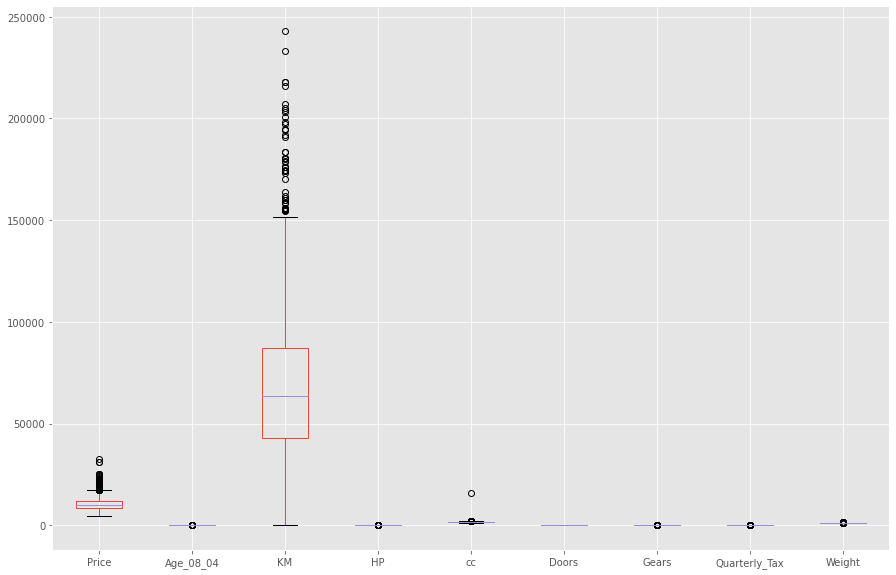

In [9]:
data.plot(kind='box')

Seems like we have outliers in our data

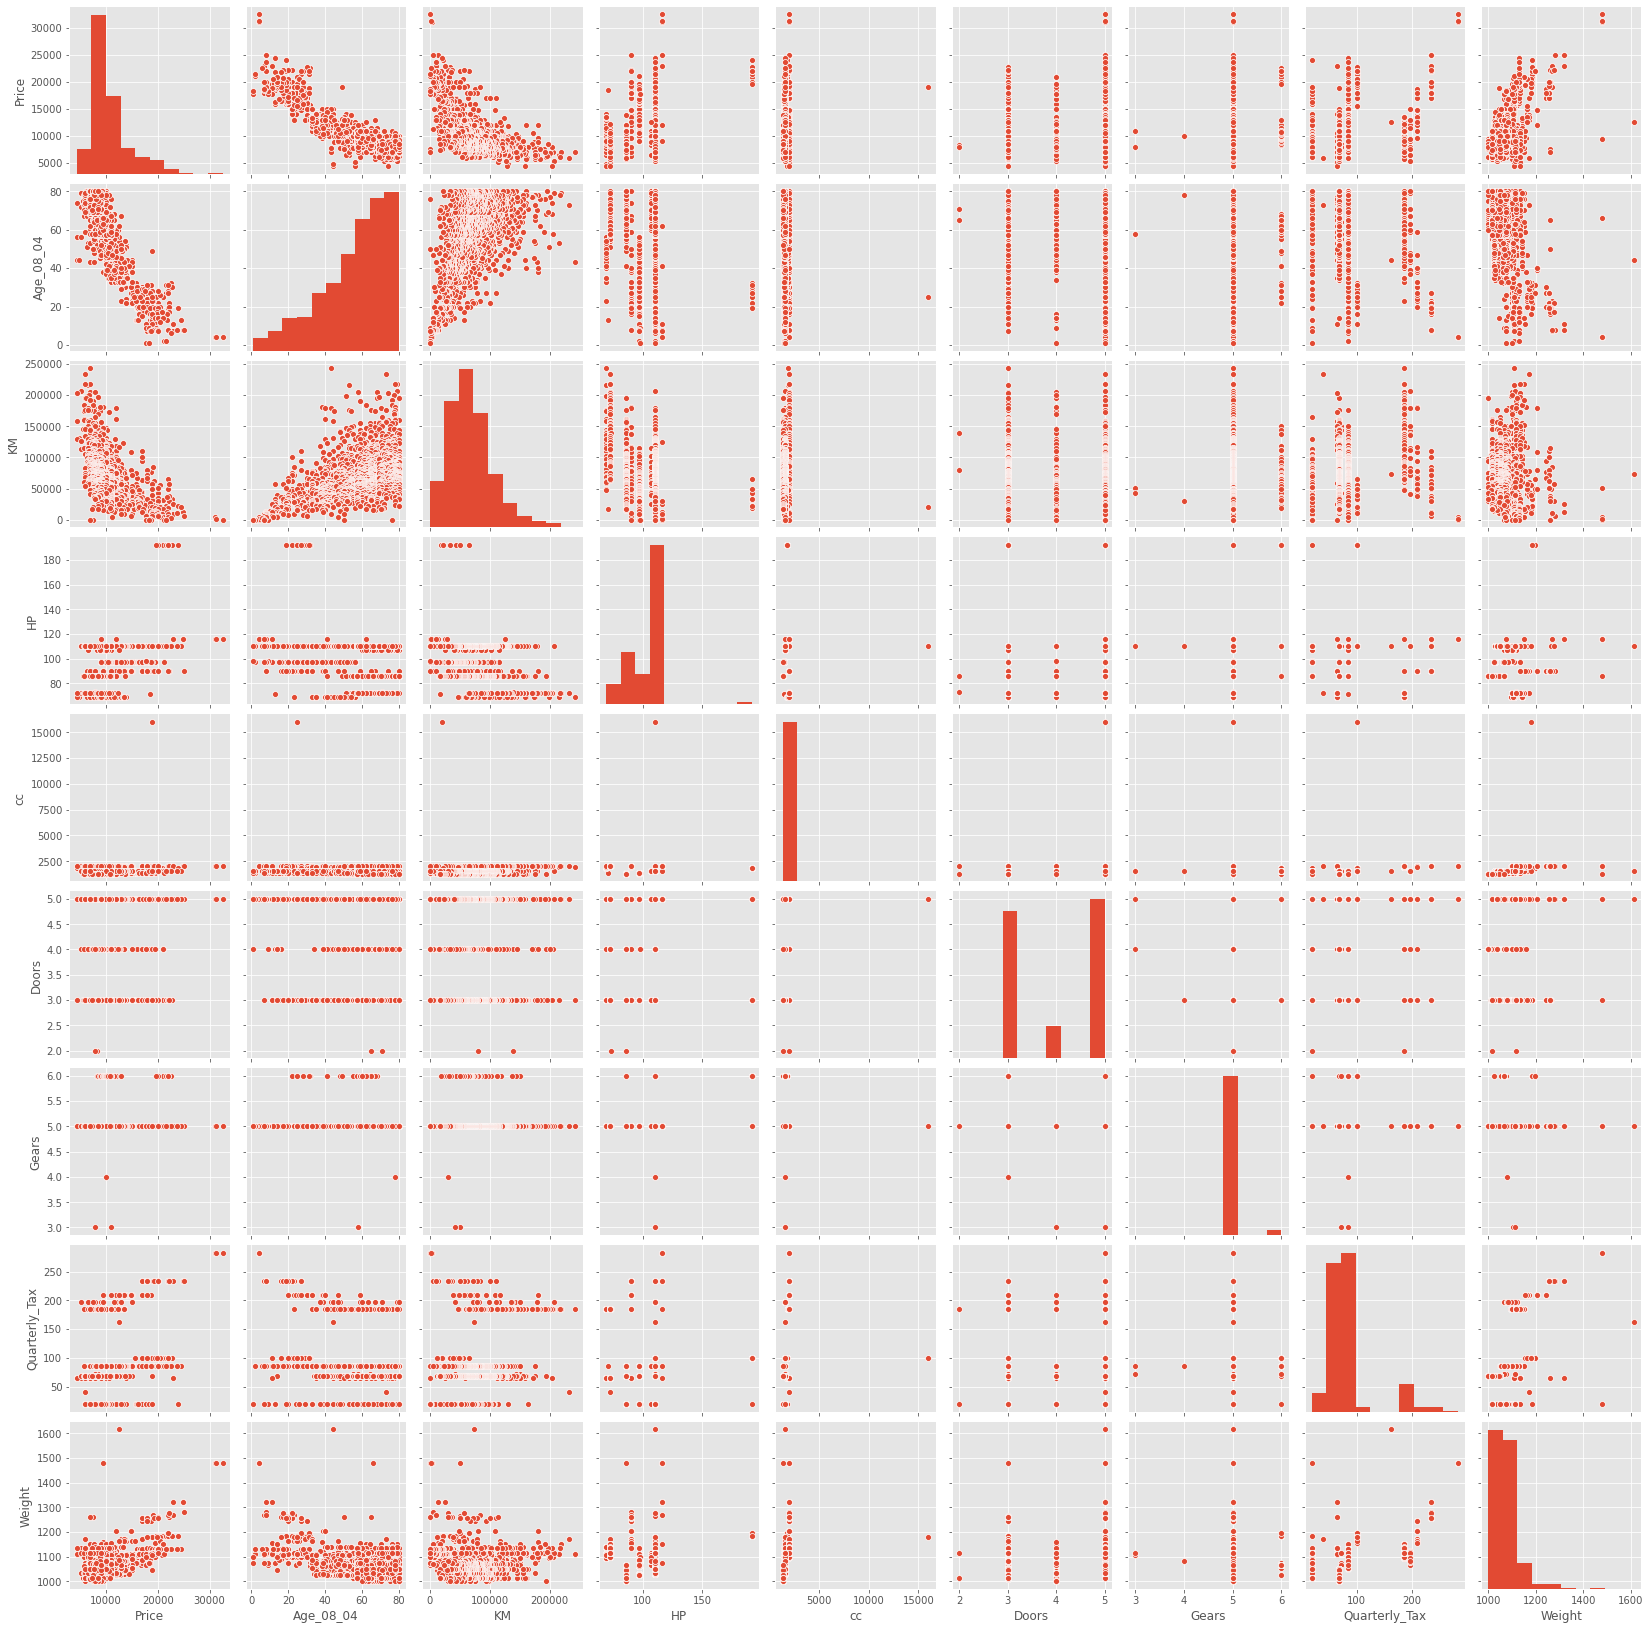

In [10]:
sns.pairplot(data)

In [11]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


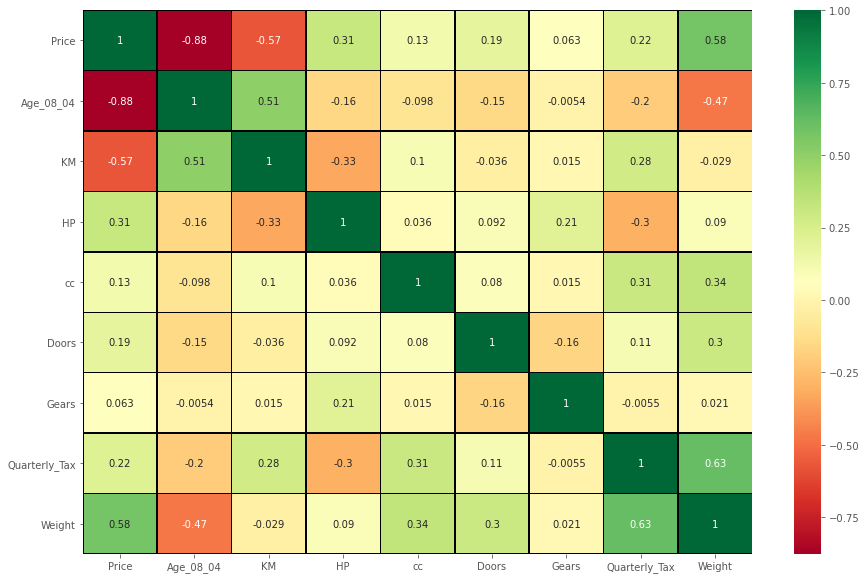

In [12]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linecolor='black',linewidths=0.5)

From above chart we can say the following:<br>
1 - Age has negative correlation with Price <br>
2 - KM has a negative correlation with Price <br>
3 - Quarterly_Tax has a positive correlation with Weight variable <br>

Lets look at these variables seperately

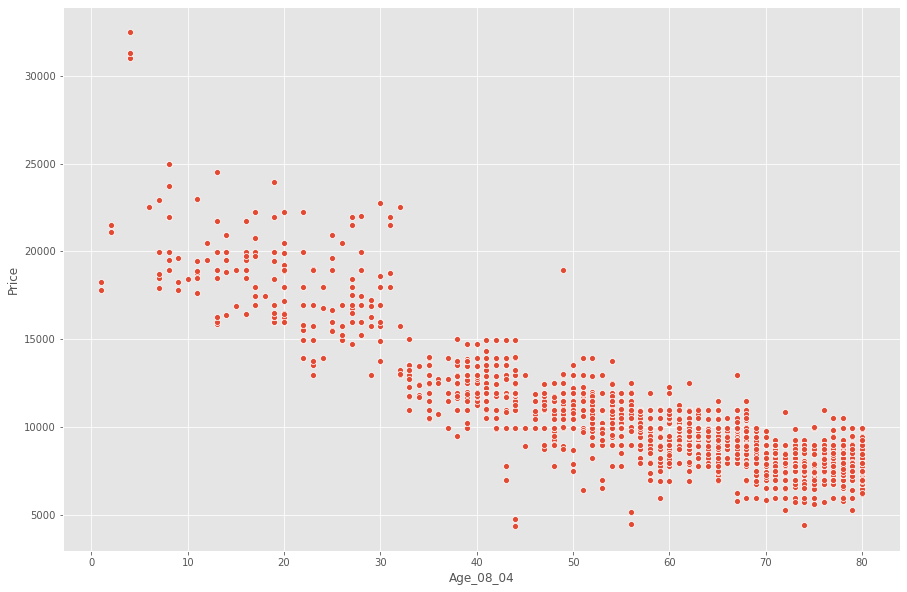

In [13]:
sns.scatterplot('Age_08_04','Price',data = data)

Lets look whether our data is following normal distribution or not

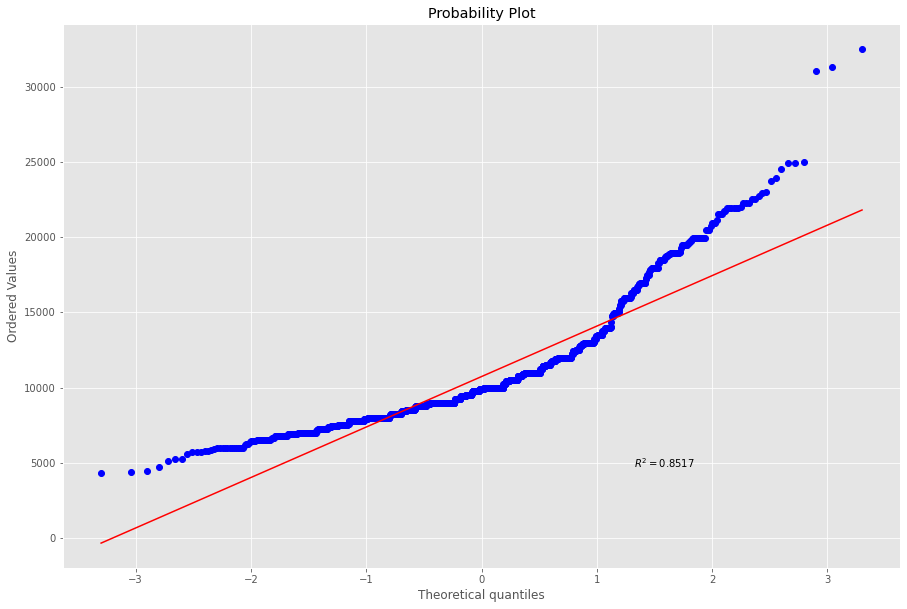

In [14]:
from scipy import stats
import pylab
stats.probplot(data.Price, dist='norm', plot = pylab, rvalue=True)
plt.show()

Lets check for co-linearity in our data

In [15]:
import statsmodels.formula.api as smf

In [16]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [17]:
ml1 = smf.ols('Price ~ Age_08_04 + KM +  HP +  cc +  Doors +  Gears + Quarterly_Tax + Weight',data = data).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:56:48   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Seems like CC and Doors have less significance in our data, lets check the same with influence plot 

In [18]:
import statsmodels.api as sm

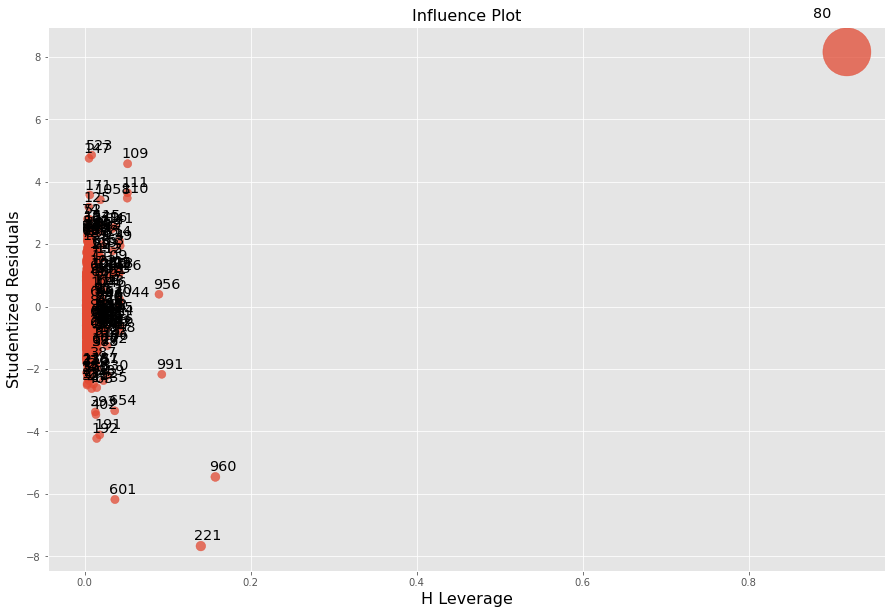

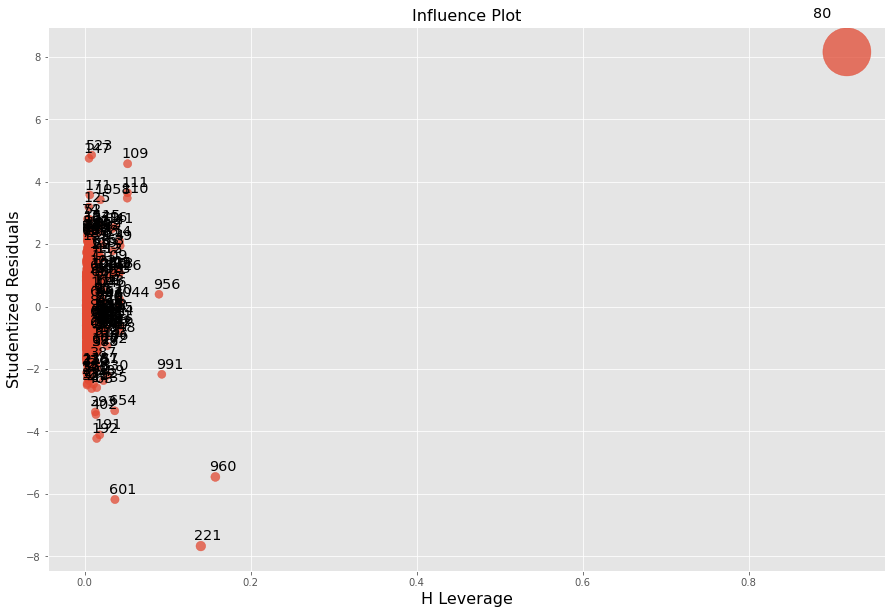

In [19]:
sm.graphics.influence_plot(ml1)

Seems like Row 80 has a highest influence in our data, lets explore it and if we cannot correct it then we will drop this row

In [20]:
data_new = data.drop(data.index[[80]])
data_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [21]:
ml2 = smf.ols('Price ~ Age_08_04 + KM +  HP +  cc +  Doors +  Gears + Quarterly_Tax + Weight',data = data_new).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:56:53   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Post removing row number 80 we can see `cc` column now has p-value which is less then 0.05

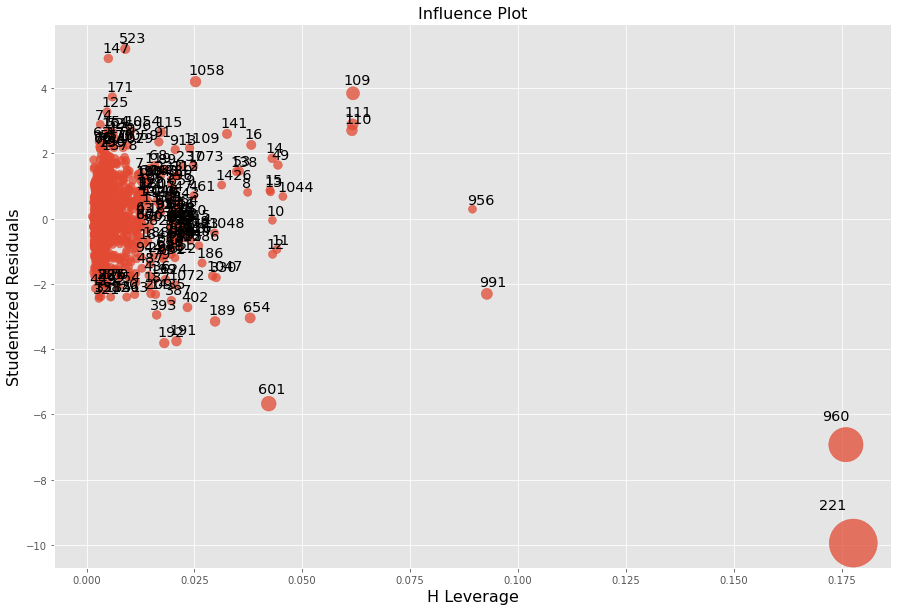

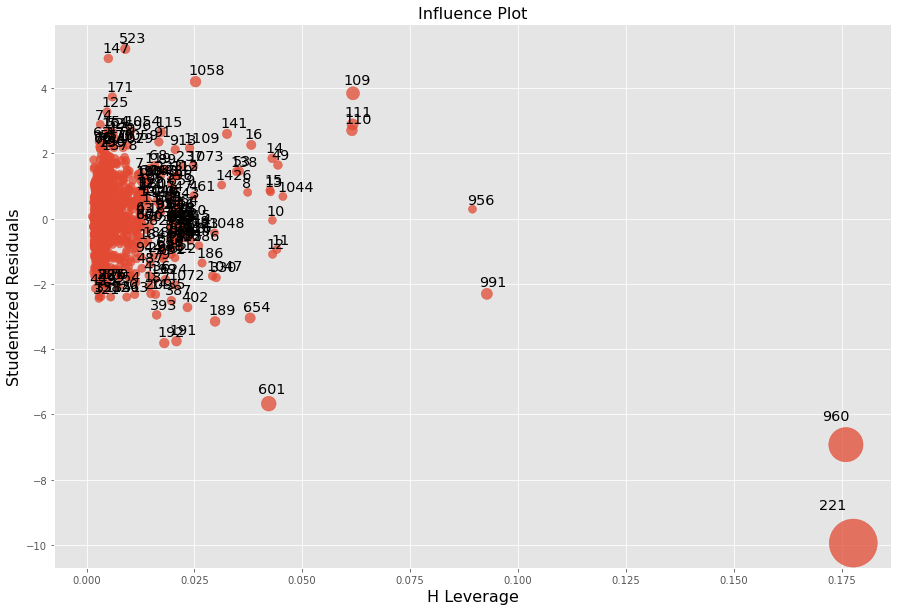

In [22]:
sm.graphics.influence_plot(ml2)

Lets drop column 221 and see if it improves p value of column Doors

In [23]:
data_new = data_new.drop(data.index[[221]])
data_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [24]:
ml3 = smf.ols('Price ~ Age_08_04 + KM +  HP +  cc +  Doors +  Gears + Quarterly_Tax + Weight',data = data_new).fit()
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:06:26   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age_08_04      -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see their is an improvement in the p value of column Doors. Lets check if do we have another row which is influencing alot

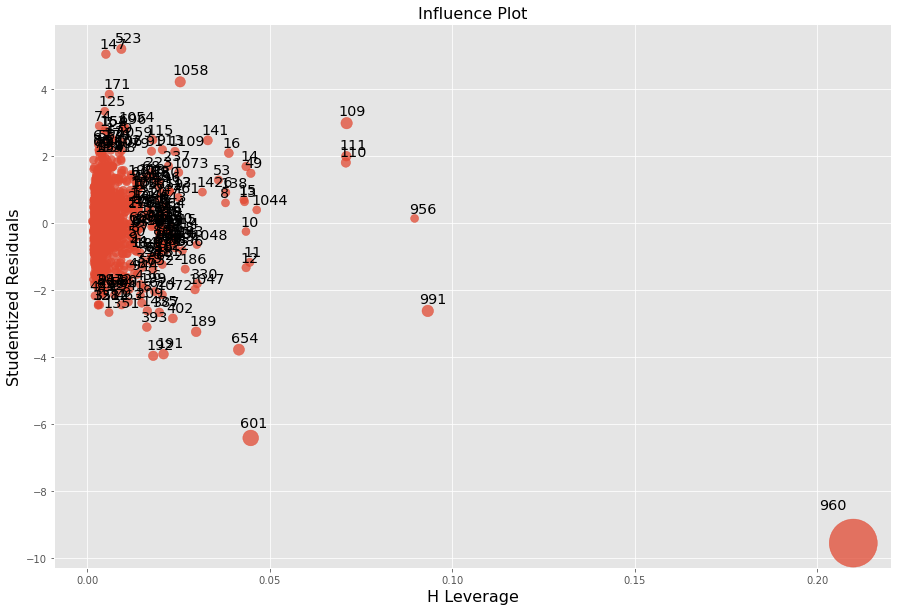

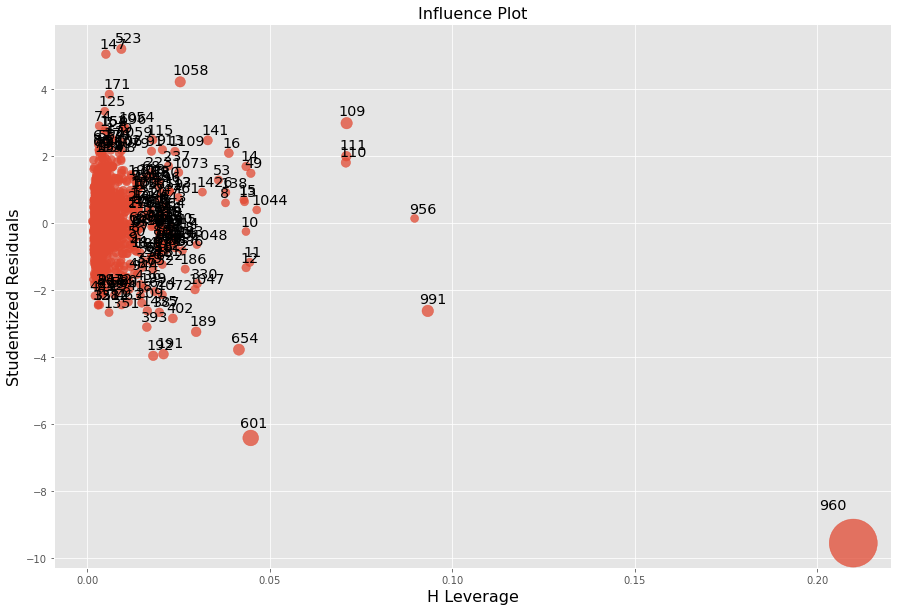

In [25]:
sm.graphics.influence_plot(ml3)

Lets remove row number 960 and check its impact on the data

In [26]:
data_new = data_new.drop(data.index[[960]])
#data_new

In [27]:
ml4 = smf.ols('Price ~ Age_08_04 + KM +  HP +  cc +  Doors +  Gears + Quarterly_Tax + Weight',data = data_new).fit()
ml4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:08:41   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see there is an improvement in Doors column p-value however Gears column p-value has increased and now it is 0.010.

We will now won't remove any row from our data

We will now build our model now

In [28]:
pred = ml3.predict(data_new)

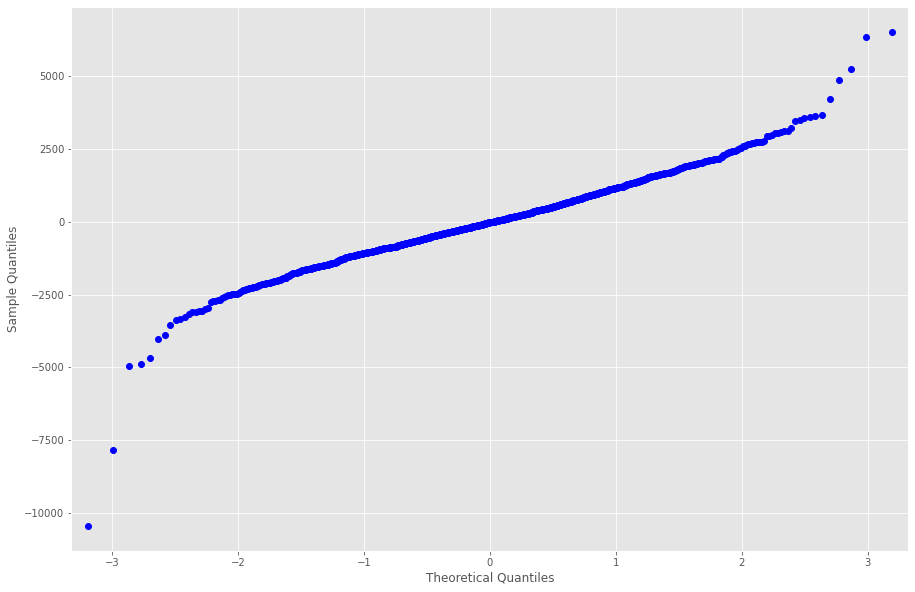

In [29]:
res = ml3.resid
sm.qqplot(res)
plt.show()

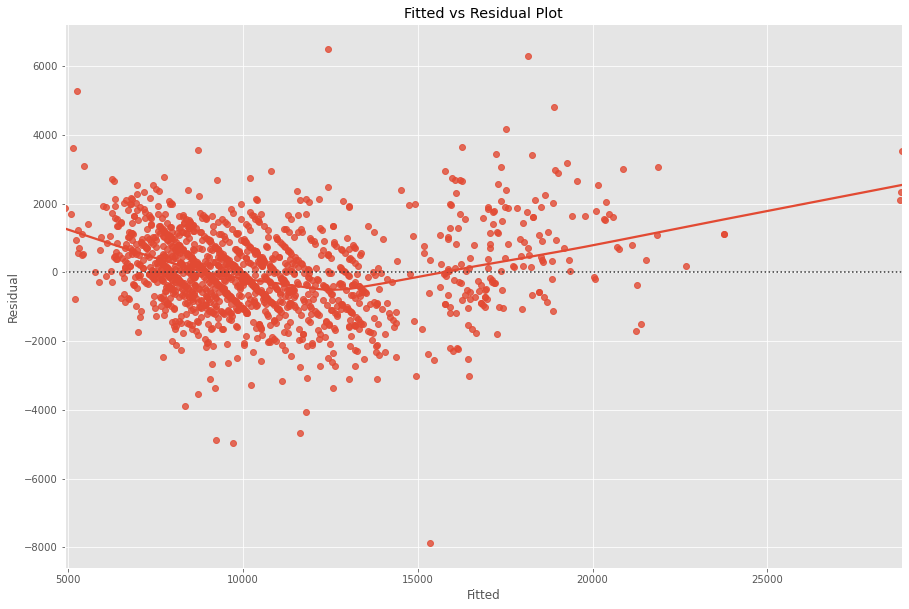

In [31]:
sns.residplot(x=pred, y = data_new.Price, lowess=True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual Plot')
plt.show()

Building Models

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
data_train, data_test = train_test_split(data_new, test_size = 0.25)
print(data_train.shape)
print(data_test.shape)

(1074, 9)
(359, 9)


In [38]:
model_train = smf.ols('Price ~ Age_08_04 + KM +  HP +  cc +  Doors +  Gears + Quarterly_Tax + Weight',data=data_new).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:15:32   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
test_pred = model_train.predict(data_test)
test_resid = test_pred - data_test.Price
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

1198.1864390393016

We will build another model however, with outlier treatment

In [40]:
data_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [41]:
new_data_backup = data_new

from scipy.stats import zscore

trans_data = data_new.iloc[:,1:].apply(zscore)
trans_data

trans_data['Price'] = data_new['Price']
trans_data

trans_data.columns

Building our models

ml2 = smf.ols('Price ~ Age_08_04 + KM +  HP +  cc +  Doors +  Gears + Quarterly_Tax + Weight',data = trans_data).fit()
ml2.summary()

sm.graphics.influence_plot(ml2)


pred = ml2.predict(trans_data)

res = ml2.resid
sm.qqplot(res)
plt.show()

stats.probplot(res,dist='norm',plot=pylab)
plt.show()

# Residuals vs Fitted plot
sns.residplot(x = pred, y = trans_data.Price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [52]:
data_new = new_data_backup
data_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [53]:
from sklearn import preprocessing

In [55]:
scaler = preprocessing.MinMaxScaler()
to_process = data_new.iloc[:,1:]

In [58]:
names = to_process.columns
d = scaler.fit_transform(to_process)
d

array([[0.27848101, 0.19335471, 0.17073171, ..., 0.66666667, 0.72348485,
        0.34375   ],
       [0.27848101, 0.30014938, 0.17073171, ..., 0.66666667, 0.72348485,
        0.34375   ],
       [0.29113924, 0.1716468 , 0.17073171, ..., 0.66666667, 0.72348485,
        0.34375   ],
       ...,
       [0.88607595, 0.07002086, 0.13821138, ..., 0.66666667, 0.18939394,
        0.03125   ],
       [0.87341772, 0.06960934, 0.13821138, ..., 0.66666667, 0.18939394,
        0.03125   ],
       [0.94936709, 0.        , 0.33333333, ..., 0.66666667, 0.        ,
        0.2375    ]])

In [59]:
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.278481,0.193355,0.170732,1.000000,0.333333,0.666667,0.723485,0.343750
1,0.278481,0.300149,0.170732,1.000000,0.333333,0.666667,0.723485,0.343750
2,0.291139,0.171647,0.170732,1.000000,0.333333,0.666667,0.723485,0.343750
3,0.316456,0.197528,0.170732,1.000000,0.333333,0.666667,0.723485,0.343750
4,0.367089,0.158433,0.170732,1.000000,0.333333,0.666667,0.723485,0.354167
...,...,...,...,...,...,...,...,...
1428,0.860759,0.084539,0.138211,0.000000,0.333333,0.666667,0.189394,0.052083
1429,0.898734,0.078186,0.138211,0.000000,0.333333,0.666667,0.189394,0.031250
1430,0.886076,0.070021,0.138211,0.000000,0.333333,0.666667,0.189394,0.031250
1431,0.873418,0.069609,0.138211,0.000000,0.333333,0.666667,0.189394,0.031250


In [60]:
scaled_df['Price'] = data_new['Price']

In [62]:
ml2 = smf.ols('Price ~ Age_08_04 + KM +  HP +  cc +  Doors +  Gears + Quarterly_Tax + Weight',data = scaled_df).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     815.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:32:03   Log-Likelihood:                -12518.
No. Observations:                1430   AIC:                         2.505e+04
Df Residuals:                    1421   BIC:                         2.510e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.715e+04    500.468     34.259      0.000    1.62e+04    1.81e+04
Age_08_04         -1e+04    244.676    -40.880      0.000   -1.05e+04   -9522.259
KM            -2761.6627    364.206     -7.583      0.000   -3476.102   -2047.223
HP             3218.2995    422.915      7.610      0.000    2388.695    4047.904
cc            -2862.5612    264.271    -10.832      0.000   -3380.964   -2344.158
Doors          -832.9980    140.472     -5.930      0.000   -1108.553    -557.443
Gears           263.4778    677.944      0.389      0.698   -1066.400    1593.356
Quarterly_Tax   273.1598    455.882      0.599      0.549    -621.115    1167.434
Weight         1.263e+04    775.121     16.290      0.000    1.11e+04    1.41e+04
==============================================================================
Omnibus:                      171.335   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.797
Skew:                           0.367   Prob(JB):                    1.33e-227
Kurtosis:                       7.123   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

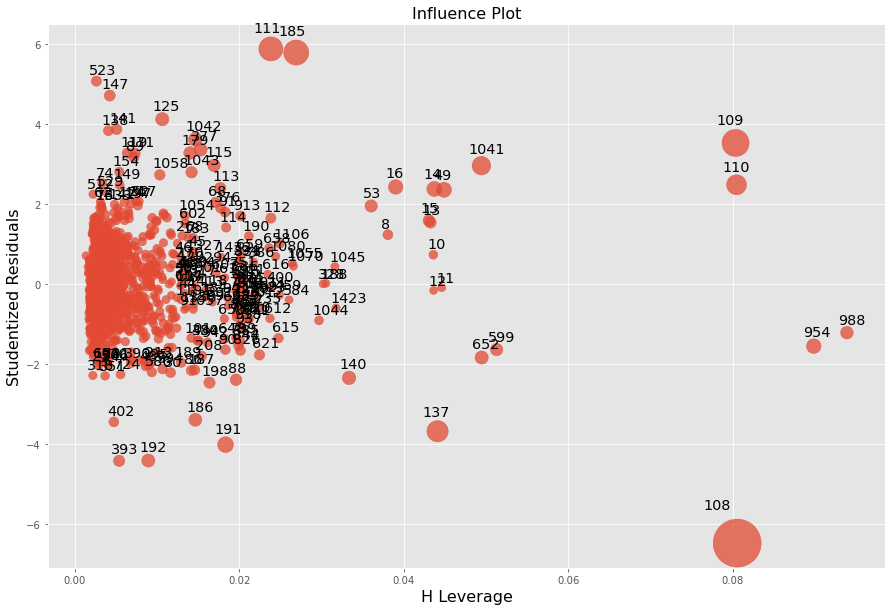

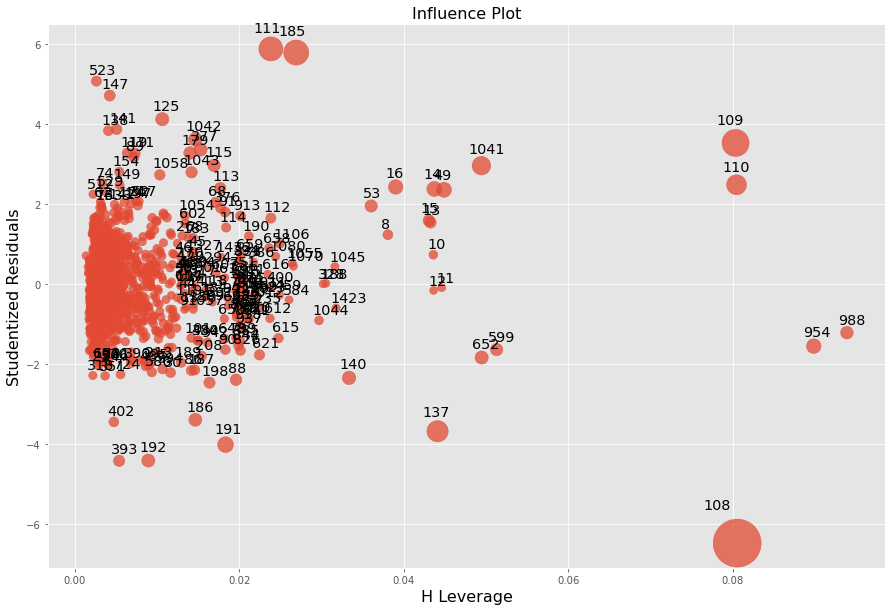

In [63]:
sm.graphics.influence_plot(ml2)

In [64]:
pred = ml2.predict(scaled_df)

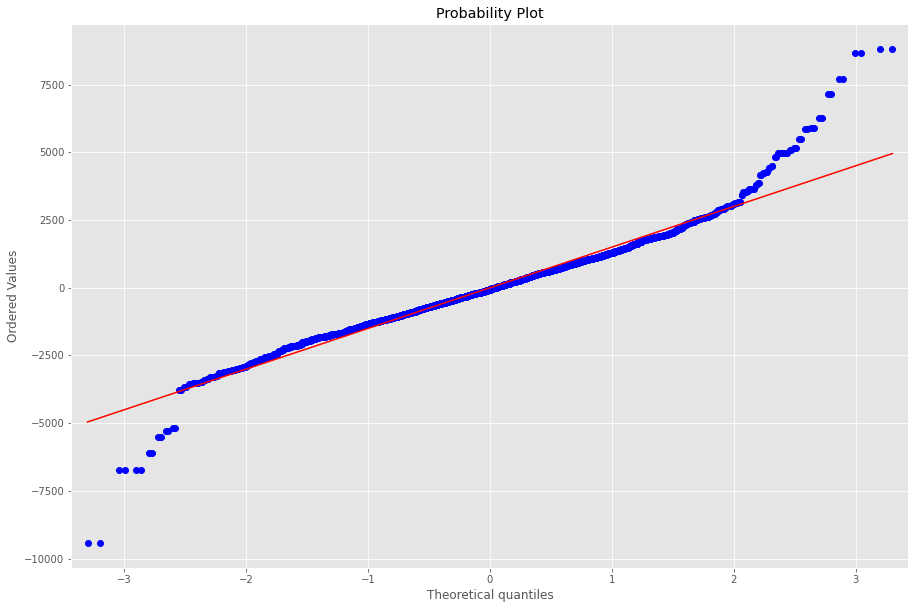

In [65]:
res = ml2.resid
sm.qqplot(res)
stats.probplot(res,dist='norm',plot=pylab)
plt.show()

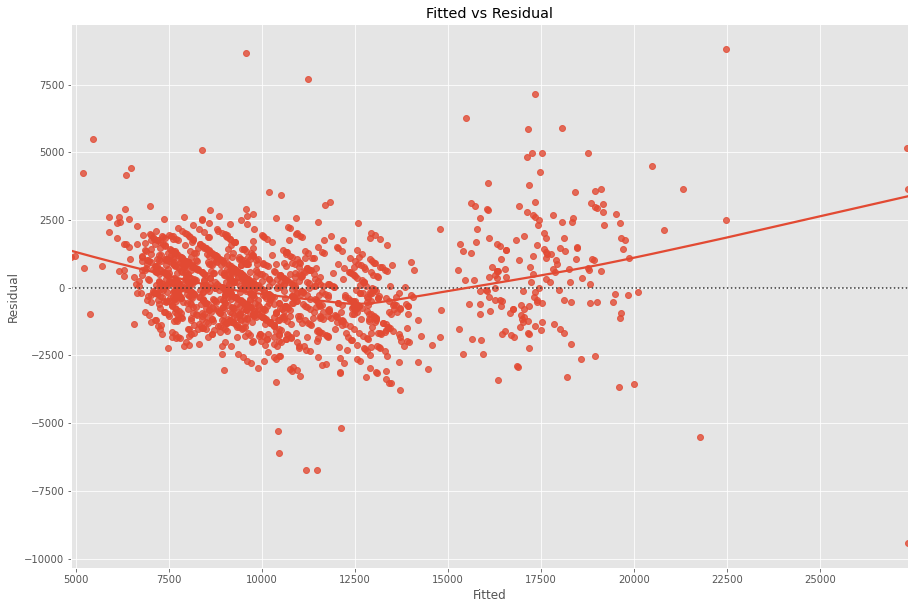

In [66]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = scaled_df.Price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [67]:
data_train, data_test = train_test_split(scaled_df, test_size = 0.25)
print(data_train.shape)
print(data_test.shape)

(1074, 9)
(359, 9)


In [69]:
model_train = smf.ols('Price ~ Age_08_04 + KM +  HP +  cc +  Doors +  Gears + Quarterly_Tax + Weight',data=scaled_df).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     815.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:35:41   Log-Likelihood:                -12518.
No. Observations:                1430   AIC:                         2.505e+04
Df Residuals:                    1421   BIC:                         2.510e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.715e+04    500.468     34.259      0.000    1.62e+04    1.81e+04
Age_08_04         -1e+04    244.676    -40.880      0.000   -1.05e+04   -9522.259
KM            -2761.6627    364.206     -7.583      0.000   -3476.102   -2047.223
HP             3218.2995    422.915      7.610      0.000    2388.695    4047.904
cc            -2862.5612    264.271    -10.832      0.000   -3380.964   -2344.158
Doors          -832.9980    140.472     -5.930      0.000   -1108.553    -557.443
Gears           263.4778    677.944      0.389      0.698   -1066.400    1593.356
Quarterly_Tax   273.1598    455.882      0.599      0.549    -621.115    1167.434
Weight         1.263e+04    775.121     16.290      0.000    1.11e+04    1.41e+04
==============================================================================
Omnibus:                      171.335   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.797
Skew:                           0.367   Prob(JB):                    1.33e-227
Kurtosis:                       7.123   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
test_pred = model_train.predict(scaled_df)
test_resid = test_pred - data_test.Price
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

1535.423188801304

We build multiple models and the best one was without any transformation and removing 3 rows. With rmse score of 1198
